In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier


In [176]:
df = pd.read_csv('data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [177]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [178]:
df['quality'].value_counts().sort_index()


3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [179]:
df['quality']=[0 if i<=5 else 1 for i in df["quality"]]

In [180]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [181]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [182]:
df.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False          False             False        False           False      False                False                 False    False  False      False    False      1599
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

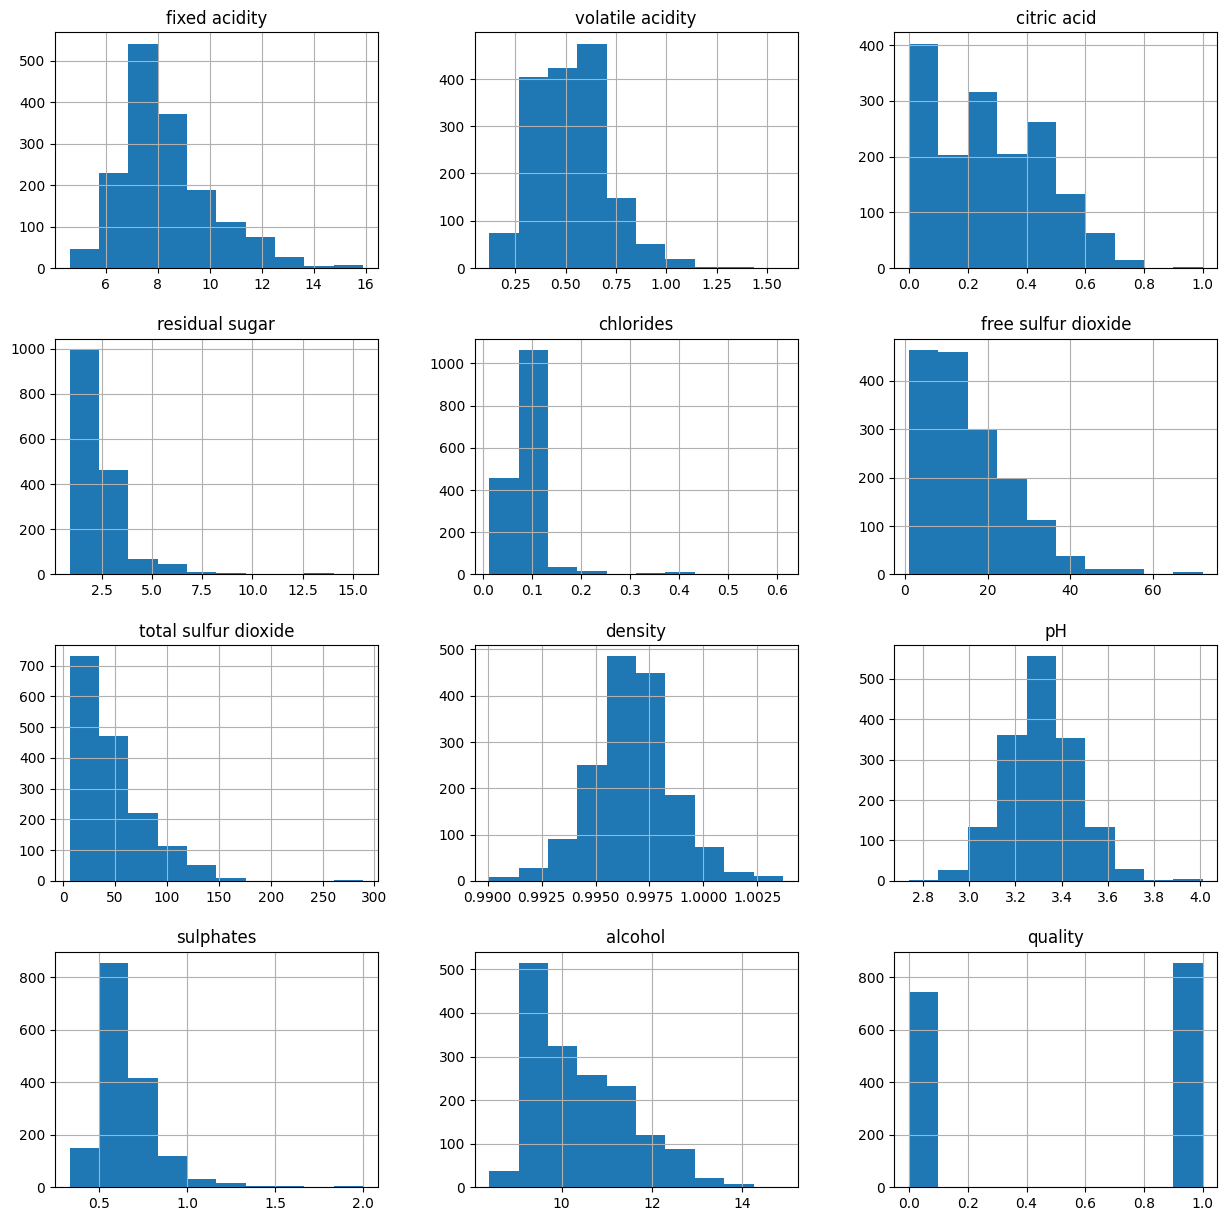

In [183]:
df.hist(figsize=(15,15))

<Axes: >

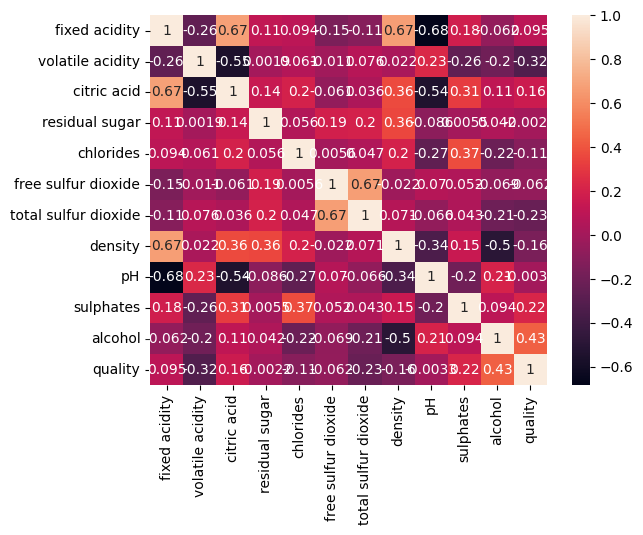

In [184]:
sns.heatmap(df.corr(),annot=True)

In [185]:
df.corrwith(df['quality']).abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.434751
volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
citric acid             0.159129
density                 0.159110
chlorides               0.109494
fixed acidity           0.095093
free sulfur dioxide     0.061757
pH                      0.003264
residual sugar          0.002160
dtype: float64

In [186]:
X = df[['alcohol','volatile acidity','total sulfur dioxide','sulphates']]
y = df['quality']

In [187]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [188]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
model = RandomForestClassifier(n_estimators=100,random_state=1)
bagging_model = BaggingClassifier(model, n_estimators=10,random_state=1)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [190]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1:",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8125
Recall: 0.8333333333333334
F1: 0.8125000000000001
[[130  34]
 [ 26 130]]


In [194]:
alcohol = 9.6
volatile_acidity = 0.7
total_sulfur_dioxide = 17
sulphates = 0.56
bagging_model.predict([[alcohol,volatile_acidity,total_sulfur_dioxide,sulphates]])[0]

1